In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)
pd.set_option('display.width',1000)

In [2]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot, plot_cross_validation_metric
from prophet.diagnostics import cross_validation, performance_metrics
import plotly.express as px

# 1 Data Analysis

In [2]:
df = pd.read_pickle("preprocessed_data.pkl")

df.head()

,AltKategoriAdi,Birim,KategoriAdı,MagazaKodu,Tarih,ÜrünKodu,Miktar
167229,50,1,21,1,2023-01-01,30.101.0079,1.0
167230,50,1,21,1,2023-01-01,30.101.0301,1.0
169961,50,2,21,1,2023-01-01,30.101.0540,1.0
347594,105,2,17,1,2023-01-01,30.101.0604,1.0
380825,115,2,2,2,2023-01-01,30.101.0605,2.0


In [3]:
df.MagazaKodu.unique()

array([1, 2, 5, 4, 6, 3], dtype=int64)

In [33]:
color_dict = {
    1: "#1f77b4",
    2: "#ff7f0e",
    3: "#2ca02c",
    4: "#d62728",
    5: "#9467bd",
    6: "#8c564b",
    7: "#e377c2",
    8: "#7f7f7f",
    9: "#bcbd22",
    10: "#17becf",
    11: "#1f77b4",
    12: "#ff7f0e",
    13: "#2ca02c",
    14: "#d62728",
    15: "#9467bd",
    16: "#8c564b",
    17: "#e377c2",
    18: "#7f7f7f",
    19: "#bcbd22",
    20: "#17becf",
    21: "#1f77b4",
    22: "#ff7f0e",
    23: "#2ca02c",
    24: "#d62728",
    25: "#9467bd",
    26: "#8c564b",
    27: "#e377c2",
    28: "#7f7f7f",
    29: "#bcbd22",
    30: "#17becf"
}

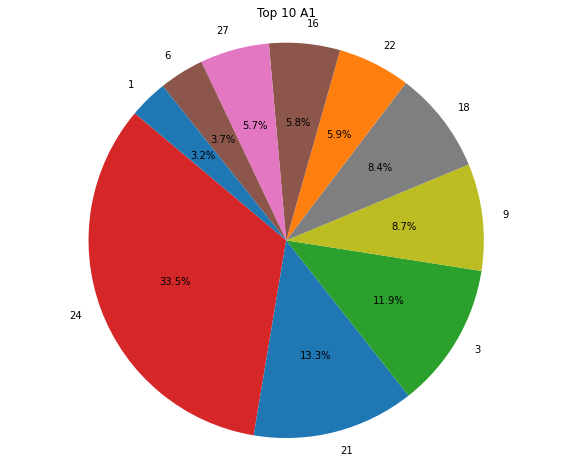

In [48]:

top_subcategories = df[df.MagazaKodu == 1].groupby("KategoriAdı").size().nlargest(10).reset_index(name='count')

plt.figure(figsize=(10, 8))
plt.pie(top_subcategories['count'], labels=top_subcategories['KategoriAdı'], autopct='%1.1f%%', startangle=140, colors=[color_dict.get(cat, '#000000') for cat in top_subcategories['KategoriAdı']])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Top 10 A1')
plt.show()


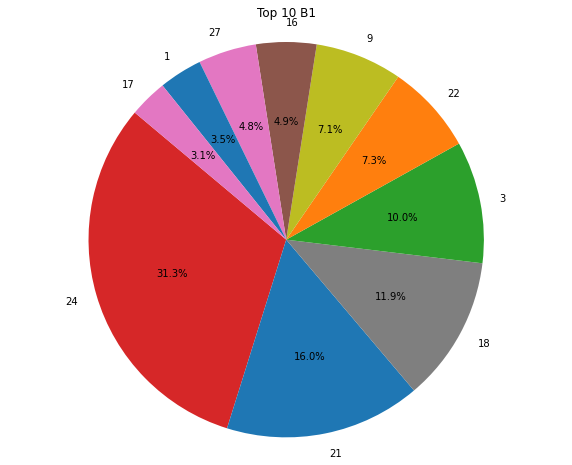

In [49]:
top_subcategories = df[df.MagazaKodu==2].groupby("KategoriAdı").size().nlargest(10).reset_index(name='count')

plt.figure(figsize=(10, 8))
plt.pie(top_subcategories['count'], labels=top_subcategories['KategoriAdı'], autopct='%1.1f%%', startangle=140, colors=[color_dict.get(cat, '#000000') for cat in top_subcategories['KategoriAdı']])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Top 10 B1')
plt.show()


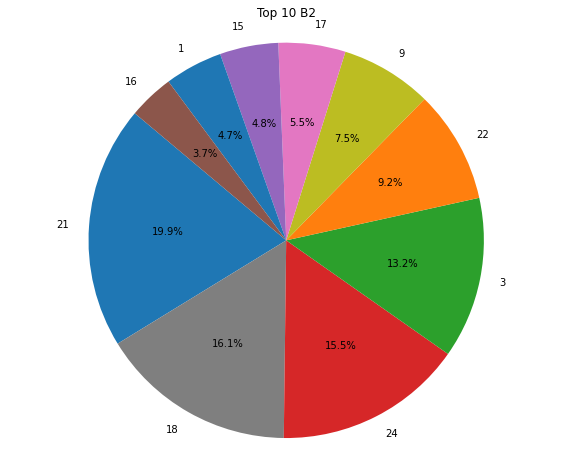

In [50]:
top_subcategories = df[df.MagazaKodu==3].groupby("KategoriAdı").size().nlargest(10).reset_index(name='count')

plt.figure(figsize=(10, 8))
plt.pie(top_subcategories['count'], labels=top_subcategories['KategoriAdı'], autopct='%1.1f%%', startangle=140, colors=[color_dict.get(cat, '#000000') for cat in top_subcategories['KategoriAdı']])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Top 10 B2')
plt.show()

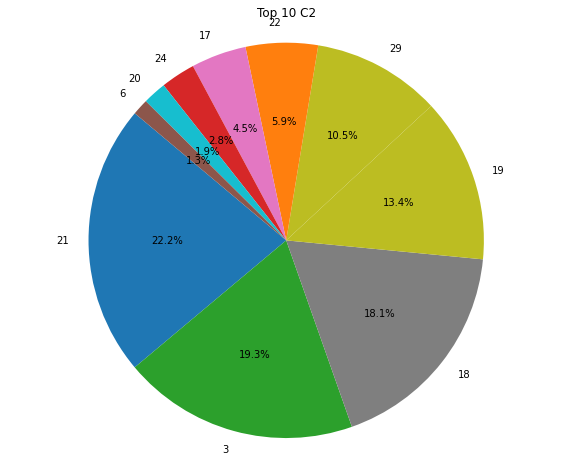

In [51]:
top_subcategories = df[df.MagazaKodu==4].groupby("KategoriAdı").size().nlargest(10).reset_index(name='count')

plt.figure(figsize=(10, 8))
plt.pie(top_subcategories['count'], labels=top_subcategories['KategoriAdı'], autopct='%1.1f%%', startangle=140, colors=[color_dict.get(cat, '#000000') for cat in top_subcategories['KategoriAdı']])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Top 10 C2')
plt.show()

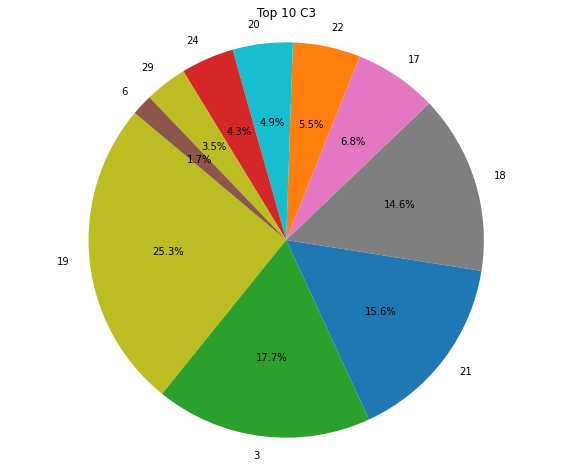

In [44]:
top_subcategories = df[df.MagazaKodu==5].groupby("KategoriAdı").size().nlargest(10).reset_index(name='count')

plt.figure(figsize=(10, 8))
plt.pie(top_subcategories['count'], labels=top_subcategories['KategoriAdı'], autopct='%1.1f%%', startangle=140, colors=[color_dict.get(cat, '#000000') for cat in top_subcategories['KategoriAdı']])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Top 10 C3')
plt.show()


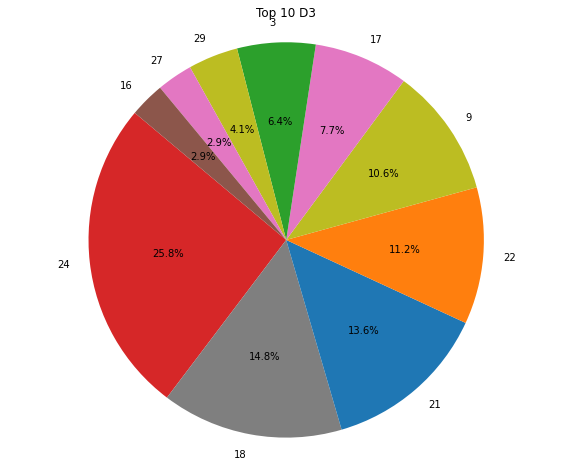

In [45]:
top_subcategories = df[df.MagazaKodu==6].groupby("KategoriAdı").size().nlargest(10).reset_index(name='count')

plt.figure(figsize=(10, 8))
plt.pie(top_subcategories['count'], labels=top_subcategories['KategoriAdı'], autopct='%1.1f%%', startangle=140, colors=[color_dict.get(cat, '#000000') for cat in top_subcategories['KategoriAdı']])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Top 10 D3')
plt.show()

In [16]:
df_kateg = pd.read_pickle("kodlar/kategori.pkl")
df_kateg

,KategoriAdı,Kategori_ID
0,Kahve Grubu,1
1,Kahvaltı Grubu,2
2,Hediyelik Ticari Ürün Grubu,3
3,Hamur işleri grubu,4
4,Çay Grubu,5
5,Atıştırmalıklar,6
6,Alkolsüz İçecek Grubu,7
7,Alkollü Kokteyl Grubu,8
8,Alkolsüz Kokteyl Grubu,9
9,Yemek Grubu,10


In [29]:
df_magaza = pd.read_pickle("kodlar/magaza.pkl")
df_magaza

,MagazaKodu,Magaza_ID
0,A1,1
1,B1,2
2,B2,3
3,C2,4
4,C3,5
5,D3,6


# 2 Model Trainig (Prophet)

Advantages of Prophet 

Prophet has several advantages associated with it. These are given below:-

1. Accurate and fast - Prophet is accurate and fast. It is used in many applications across Facebook for producing reliable forecasts for planning and goal setting.
2. Fully automatic - Prophet is fully automatic. We will get a reasonable forecast on messy data with no manual effort.
3. Tunable forecasts - Prophet produces adjustable forecasts. It includes many possibilities for users to tweak and adjust forecasts. We can use human-interpretable parameters to improve the forecast by adding our domain knowledge.
4. Available in R or Python - We can implement the Prophet procedure in R or Python.
5. Handles seasonal variations well - Prophet accommodates seasonality with multiple periods.
6. Robust to outliers - It is robust to outliers. It handles outliers by removing them.
7. Robust to missing data - Prophet is resilient to missing data.

Her Mağazadaki ÜrünKodu için bakılacak.

In [3]:
df = pd.read_pickle("preprocessed_data.pkl")

In [4]:
df.head()

,AltKategoriAdi,Birim,KategoriAdı,MagazaKodu,Tarih,ÜrünKodu,Miktar
167229,50,1,21,1,2023-01-01,30.101.0079,1.0
167230,50,1,21,1,2023-01-01,30.101.0301,1.0
169961,50,2,21,1,2023-01-01,30.101.0540,1.0
347594,105,2,17,1,2023-01-01,30.101.0604,1.0
380825,115,2,2,2,2023-01-01,30.101.0605,2.0


In [5]:
df.ÜrünKodu = df.ÜrünKodu.astype("string")

In [6]:
for i in range(1,7):
    print("MagazaKodu =", i,
          ", Veri Miktari =", len(df[df.MagazaKodu == i]), 
          ", Unique ÜrünKodu Sayisi =", len(df[df.MagazaKodu == i].ÜrünKodu.unique()))

MagazaKodu = 1 , Veri Miktari = 71401 , Unique ÜrünKodu Sayisi = 313
MagazaKodu = 2 , Veri Miktari = 87104 , Unique ÜrünKodu Sayisi = 383
MagazaKodu = 3 , Veri Miktari = 49561 , Unique ÜrünKodu Sayisi = 331
MagazaKodu = 4 , Veri Miktari = 85789 , Unique ÜrünKodu Sayisi = 410
MagazaKodu = 5 , Veri Miktari = 75739 , Unique ÜrünKodu Sayisi = 337
MagazaKodu = 6 , Veri Miktari = 13335 , Unique ÜrünKodu Sayisi = 163


In [7]:
df.dtypes

AltKategoriAdi             int64
Birim                      int64
KategoriAdı                int64
MagazaKodu                 int64
Tarih             datetime64[ns]
ÜrünKodu          string[python]
Miktar                   float64
dtype: object

In [8]:
df_A1 = df[df.MagazaKodu == 1].copy()
df_B1 = df[df.MagazaKodu == 2].copy()
df_B2 = df[df.MagazaKodu == 3].copy()
df_C2 = df[df.MagazaKodu == 4].copy()
df_C3 = df[df.MagazaKodu == 5].copy()
df_D3 = df[df.MagazaKodu == 6].copy()

In [9]:
# adjusting current data to use with Prophet
df_prophet_A1 = df_A1[["ÜrünKodu","Tarih","Miktar"]].copy().rename(columns={"Tarih": 'ds', "Miktar": 'y'})
df_prophet_B1 = df_B1[["ÜrünKodu","Tarih","Miktar"]].copy().rename(columns={"Tarih": 'ds', "Miktar": 'y'})
df_prophet_B2 = df_B2[["ÜrünKodu","Tarih","Miktar"]].copy().rename(columns={"Tarih": 'ds', "Miktar": 'y'})
df_prophet_C2 = df_C2[["ÜrünKodu","Tarih","Miktar"]].copy().rename(columns={"Tarih": 'ds', "Miktar": 'y'})
df_prophet_C3 = df_C3[["ÜrünKodu","Tarih","Miktar"]].copy().rename(columns={"Tarih": 'ds', "Miktar": 'y'})
df_prophet_D3 = df_D3[["ÜrünKodu","Tarih","Miktar"]].copy().rename(columns={"Tarih": 'ds', "Miktar": 'y'})

In [13]:
def predict_amount(df_prophet_magaza):
    forecasts, ms, skipped = [], [], {1:[],2:[],3:[],4:[],5:[],6:[]}
    for i in df_prophet_magaza.ÜrünKodu.unique()[:100]:
        df_prophet = df_prophet_magaza[df_prophet_magaza.ÜrünKodu == i][["ds","y"]].copy()
        df_train = df_prophet[df_prophet['ds'] <= '2023-10-01']
        df_test = df_prophet[df_prophet['ds'] > '2023-10-01']
        # print("For ÜrünKodu =", i)
        # print("Training data range: ", len(df_train), "records, from:", df_train['ds'].min(), "to", df_train['ds'].max())
        # print("Test data range: ", len(df_test), "records, from:", df_test['ds'].min(), "to", df_test['ds'].max())
        if len(df_test) > 0 or len(df_train) > 0:
            try:
                m = Prophet(interval_width=0.9)
                m.fit(df_train)
                try:
                    # Create a future dataframe for prediction
                    future = m.make_future_dataframe(periods=len(df_test), freq='D') # same day lenght as df_test
                    # Forecast the future dataframe values 
                    forecast = m.predict(future)
                except Exception as e2:
                    print(e2, "Cannot test model")
                    forecast = 0
            except Exception as e1:
                print(e1, "Cannot train model")
                m = 0
        else:
            skipped[1].append(i)
            m, forecast == 0, 0
        # save for further anaylsis
        forecasts.append(forecast)
        ms.append(m)

    return forecasts, ms, skipped, df_prophet_magaza.ÜrünKodu.unique()

## 2.1 Magaza A1

In [14]:
forecasts_A1, ms_A1, skipped_A1, unique_A1 = predict_amount(df_prophet_A1)

17:42:57 - cmdstanpy - INFO - Chain [1] start processing
17:42:57 - cmdstanpy - INFO - Chain [1] done processing
17:42:58 - cmdstanpy - INFO - Chain [1] start processing
17:42:58 - cmdstanpy - INFO - Chain [1] done processing
17:42:58 - cmdstanpy - INFO - Chain [1] start processing
17:42:59 - cmdstanpy - INFO - Chain [1] done processing
17:42:59 - cmdstanpy - INFO - Chain [1] start processing
17:42:59 - cmdstanpy - INFO - Chain [1] done processing
17:42:59 - cmdstanpy - INFO - Chain [1] start processing
17:43:00 - cmdstanpy - INFO - Chain [1] done processing
17:43:00 - cmdstanpy - INFO - Chain [1] start processing
17:43:01 - cmdstanpy - INFO - Chain [1] done processing
17:43:01 - cmdstanpy - INFO - Chain [1] start processing
17:43:01 - cmdstanpy - INFO - Chain [1] done processing
17:43:01 - cmdstanpy - INFO - Chain [1] start processing
17:43:01 - cmdstanpy - INFO - Chain [1] done processing
17:43:02 - cmdstanpy - INFO - Chain [1] start processing
17:43:02 - cmdstanpy - INFO - Chain [1]

In [15]:
len(forecasts_A1), len(ms_A1), len(unique_A1)

(100, 100, 313)

In [ ]:
forecasts_A1.to_pickle("forecasts_A1.pkl")
ms_A1.to_pickle("ms_A1.pkl")
unique_A1.to_pickle("unique_A1.pkl")

## 2.2 Mağaza B1

In [ ]:
forecasts_B1, ms_B1, skipped_B1, unique_B1 = predict_amount(df_prophet_B1)

In [ ]:
len(forecasts_B1), len(ms_B1), len(unique_B1)

In [ ]:
forecasts_A1.to_pickle("forecasts_A1.pkl")
ms_A1.to_pickle("ms_A1.pkl")
unique_A1.to_pickle("unique_A1.pkl")

## 2.3 Mağaza B2

In [ ]:
forecasts_B2, ms_B2, skipped_B2, unique_B2 = predict_amount(df_prophet_B2)

In [ ]:
len(forecasts_B2), len(ms_B2), len(unique_B2)

## 2.4 Mağaza C2

In [ ]:
forecasts_C2, ms_C2, skipped_C2, unique_C2 = predict_amount(df_prophet_C2)

In [ ]:
len(forecasts_C2), len(ms_C2), len(unique_C2)

## 2.5 Mağaza C3

In [ ]:
forecasts_C3, ms_C3, skipped_C3, unique_C3 = predict_amount(df_prophet_C3)

In [ ]:
len(forecasts_C3), len(ms_C3), len(unique_C3)

## 2.6 Mağaza D3

In [ ]:
forecasts_D3, ms_D3, skipped_D3, unique_D32 = predict_amount(df_prophet_D3)

In [36]:
len(forecasts_D3), len(ms_D3)

(313, 313)

In [22]:
unique_A1[10]

'30.103.0485'

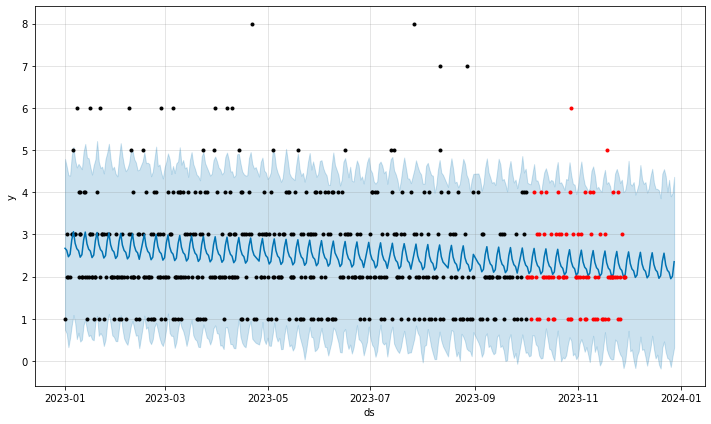

In [19]:
fig = ms_A1[10].plot(forecasts_A1[10])
ax = fig.gca()
dfProphet_test = df_prophet_A1[df_prophet_A1["ÜrünKodu"] ==  unique_A1[10]]
ax.plot(dfProphet_test[dfProphet_test['ds'] > '2023-10-01']['ds'].to_numpy(), dfProphet_test[dfProphet_test['ds'] > '2023-10-01']['y'].to_numpy(), 'r.')

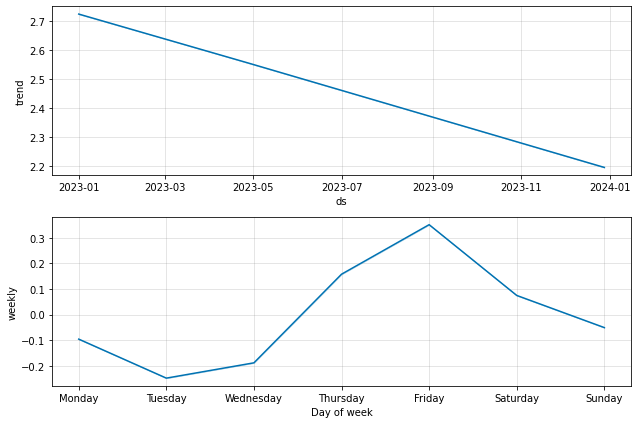

In [21]:
ms_A1[10].plot_components(forecasts_A1[10], weekly_start=1);

In [40]:
forecasts[0].tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
94,2023-10-11,1.176464,-0.492925,2.111403,1.176464,1.176464,-0.319865,-0.319865,-0.319865,-0.319865,-0.319865,-0.319865,0.0,0.0,0.0,0.856599
95,2023-10-12,1.174910,-0.068206,2.360672,1.174910,1.174910,-0.138968,-0.138968,-0.138968,-0.138968,-0.138968,-0.138968,0.0,0.0,0.0,1.035942
96,2023-10-13,1.173356,-0.092687,2.366441,1.173356,1.173356,-0.102606,-0.102606,-0.102606,-0.102606,-0.102606,-0.102606,0.0,0.0,0.0,1.070750
97,2023-10-14,1.171802,0.254326,2.754213,1.171802,1.171802,0.357594,0.357594,0.357594,0.357594,0.357594,0.357594,0.0,0.0,0.0,1.529396
98,2023-10-15,1.170248,0.188126,2.765884,1.170248,1.170248,0.251250,0.251250,0.251250,0.251250,0.251250,0.251250,0.0,0.0,0.0,1.421498


In [24]:
# Cross validation
df_cv = cross_validation(ms_A1[10], initial="100 days", period="25 days", horizon="30 days", parallel="processes")
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-04-30,2.848257,0.780618,4.803119,3.0,2023-04-29
1,2023-04-30,2.848257,0.874839,4.842265,3.0,2023-04-29
2,2023-05-01,2.883271,0.904699,4.945401,1.0,2023-04-29
3,2023-05-01,2.883271,0.842699,4.935303,2.0,2023-04-29
4,2023-05-02,2.509493,0.551104,4.517220,3.0,2023-04-29


In [25]:
# Model performance metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,1.113073,1.055023,0.828248,0.492775,0.199334,0.350201,0.925714
1,4 days,1.860337,1.363942,1.069369,0.599009,0.348024,0.435443,0.912000
2,5 days,1.960471,1.400168,1.118767,0.533091,0.389188,0.421266,0.880000
3,6 days,1.554200,1.246676,1.032114,0.498796,0.348273,0.399704,0.920000
4,7 days,1.318502,1.148260,1.014493,0.617186,0.367736,0.436770,0.970000


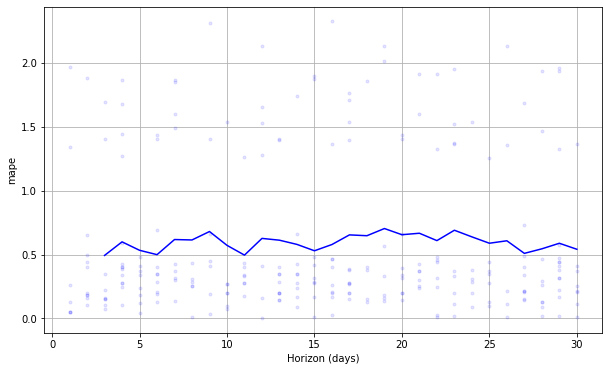

In [26]:
# Visualize the performance metrics
fig = plot_cross_validation_metric(df_cv, metric = "mape", point_color="blue")